In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
from tools import *

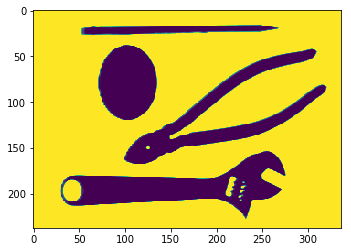

In [2]:
# example images
I = read_grayscale('data/tools.tiff')
I2 = read_grayscale('data/Scene/CALsuburb/image_0205.jpg')
plt.imshow(I)

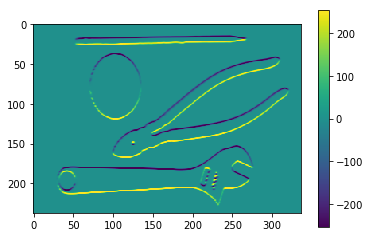

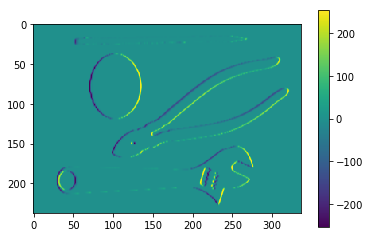

In [3]:
def compute_grad(I):
    hb = 0.5*np.array([-1,0,1])
    ha = 0.5*np.array([1,2,1])
    Ix = conv_separable(I, ha, hb)
    Iy = conv_separable(I, hb, ha)
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [4]:
def compute_grad_mod_ori(I):
    Ix, Iy = compute_grad(I)
    Gm = np.sqrt(Ix**2 + Iy**2)     #norme du gradient
    Go = compute_grad_ori(Gm, Ix, Iy)
    return Gm, Go

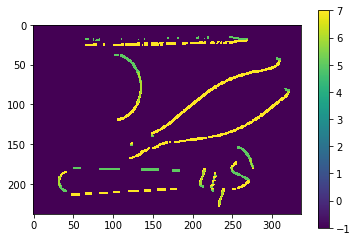

In [5]:
i,t = compute_grad_mod_ori(I)
plt.imshow(t)
plt.colorbar()
plt.show()

In [6]:
def compute_sift_region(Gm, Go, mask=None):
    
    # Note: to apply the mask only when given, do:
    if mask is not None:
        G_pond = Gm*mask
    else:
        G_pond = Gm
    Renc = np.zeros((16,8))
    for i in range(len(Gm)):
        for j in range(len(Gm[0])):
            Renc[i%4+j%4][Go[i,j]] += G_pond[i,j]
    Penc = np.reshape(np.array(Renc), 128)
    n = np.linalg.norm(Penc)
    if (n <= 0.5):
        return np.zeros(128)
    else:
        Penc /= n
    Penc[Penc>0.2] = 0.2
    n = np.linalg.norm(Penc)
    Penc /= n
    return Penc